# Deutsch Algorithm

Input: $f:\{0, 1\} -> \{0, 1\}$
Output: 0 if $f$ constant,  1 if $f$ is balanced.

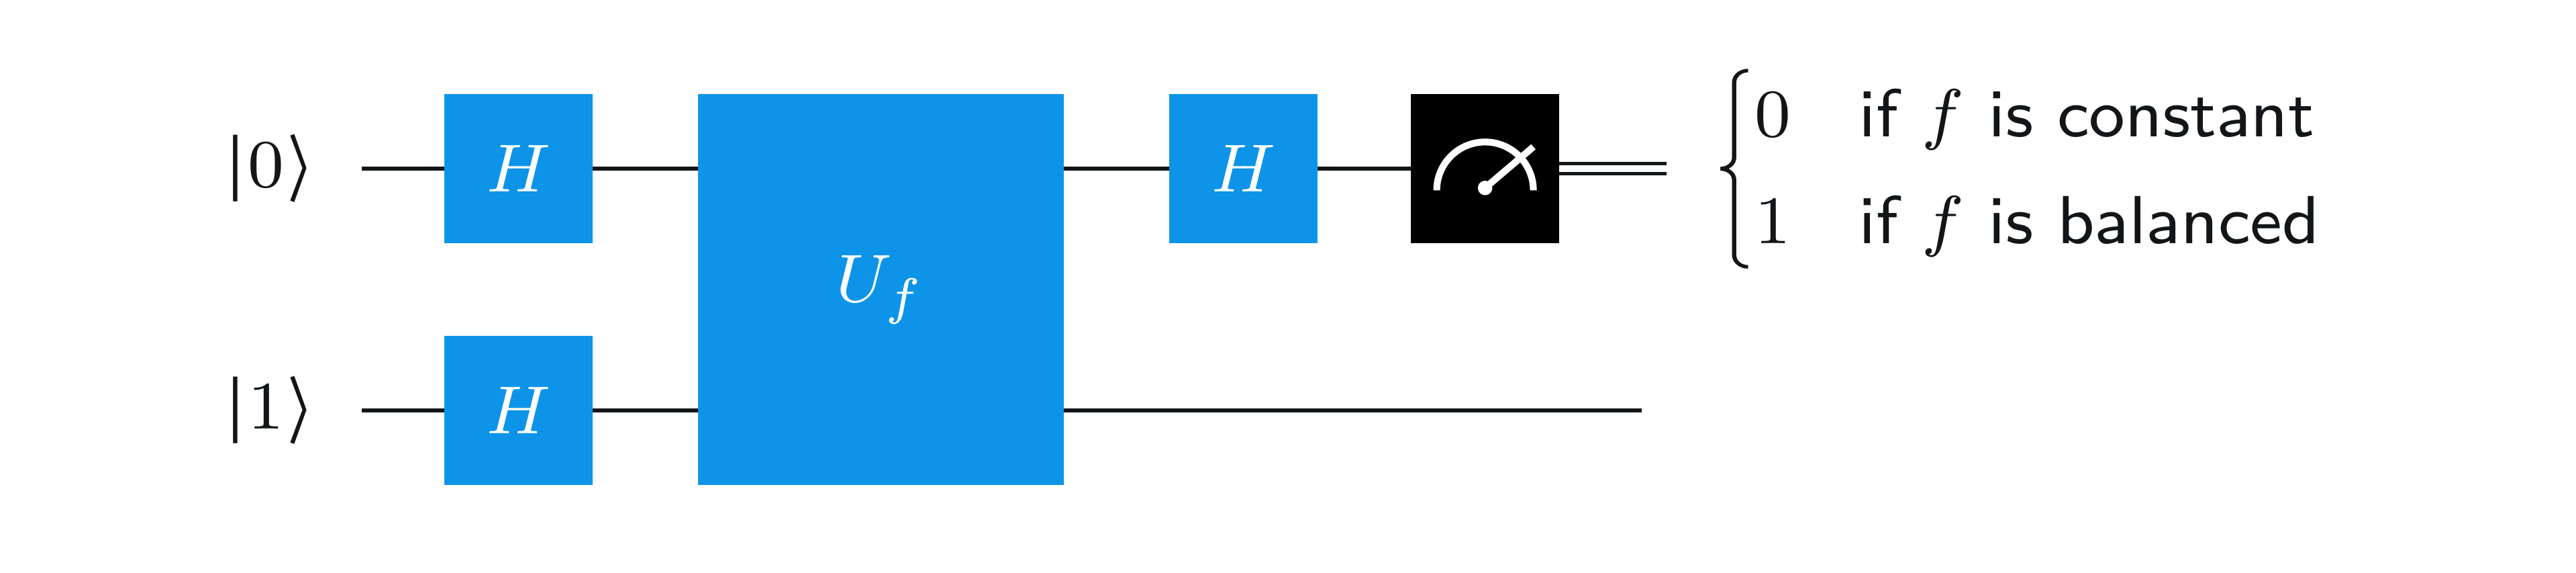

In [30]:
from qiskit import QuantumCircuit
def oracle(case: int):
    if case not in [1,2,3,4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    circ = QuantumCircuit(2)
    if case in [2,3]:
        circ.cx(0, 1)
    if case in [3,4]:
        circ.x(1)
    return circ

In [31]:
def deutsch_algorithm(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)

    qc.x(n)
    qc.h(range(n+1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

In [32]:
deutsch_algorithm(
    oracle(3)
).draw()

┌───┐      ░            ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║ 
c: 1/════════════════════════════════╩═
                                     0

In [33]:
from qiskit import Aer

def simulator(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = deutsch_algorithm(function)
    backend = Aer.get_backend('aer_simulator')
    result = backend.run(qc,shots=1,memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == '0':
        return "constant"
    return "balanced"

In [34]:
f = oracle(3)
display(f.draw())
simulator(f)

q_0: ──■───────
     ┌─┴─┐┌───┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

'balanced'

# Deutsch Jozsa Algorithm

In [35]:
def dj_oracle(num_qubits):
    qc = QuantumCircuit(num_qubits+1)
    # TODO : Create a Constant Oracle. for n qubits
    
    
    
    # TODO: Create a Balanced Oracle
    
    
    
    

In [36]:
def dj(function: QuantumCircuit):
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [38]:


def simulator(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)
    backend = Aer.get_backend('aer_simulator')
    result = backend.run(qc,shots=1,memory=True).result()
    measurements = result.get_memory()
    if '1' in measurements[0]:
        return 'balanced'
    return 'constant'

In [41]:
f = dj_oracle(3)
# simulator(f)

# Search Algorithms

1. Apply the oracle O.
2. Apply the Hadamard transform $H^{⊗n}$
3. Perform a conditional phase shift on the computer
4. Apply the Hadamard transform $H^{⊗n}$

Qiskit gives us a standard Grover implementation. Let us use this to solve some problems

Given an database [0,1,2,3,4,5], find the value 2. Do this manually, then use qiskit.

There is one really important thing we learn from grover. How many times do we apply the phase shift?

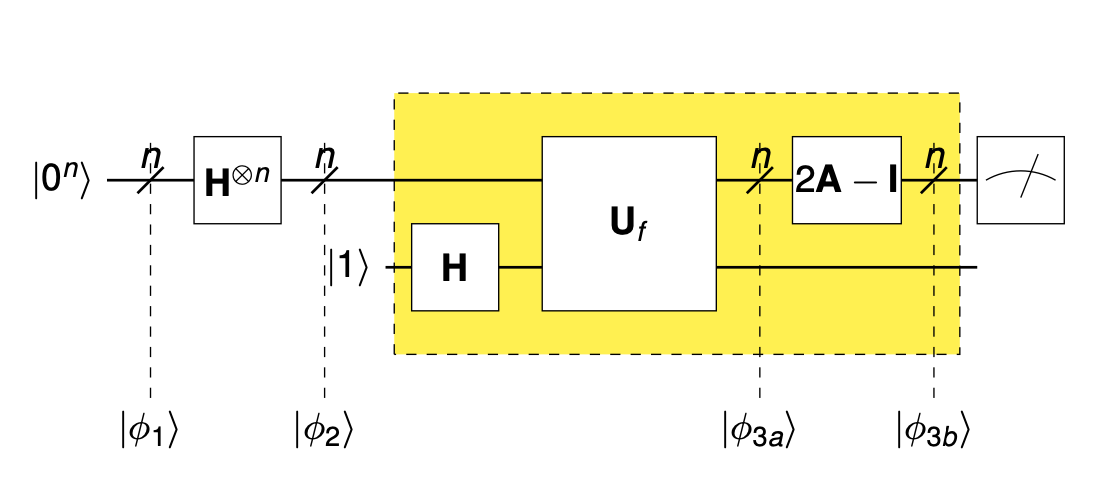

# QAOA

After Reading the paper, implement QAOA